In [20]:
%pip install numpy pandas matplotlib scipy scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd

# Parameters
K = 350000         # Carrying capacity
A0 = 0.05*K          # Initial adoption
A6 = 0.4*K         # Adoption after 6 months
t_target = 6         # Time in months

# Solve for r using the logistic growth formula
def solve_r(K, A0, A_target, t):
    ratio = (K - A0) / A0
    r = -np.log((K / A_target - 1) / ratio) / t
    return r

r = solve_r(K, A0, A6, t_target)

# Logistic growth function
def logistic(t, K, A0, r):
    return K / (1 + ((K - A0) / A0) * np.exp(-r * t))

# Generate table
months = np.arange(13)
adoption = logistic(months, K, A0, r).round().astype(int)
daily_avg = (adoption / 30).round().astype(int)

# Create DataFrame
df = pd.DataFrame({
    "Month": months,
    "Daily users": adoption,
})

# Display table
print(df.to_string(index=False))

#print the value of r
print(f"\nCalculated growth rate (r): {r:.4f} per month")

 Month  Daily users
     0        17500
     1        26033
     2        38248
     3        55218
     4        77837
     5       106377
     6       140000
     7       176548
     8       212962
     9       246225
    10       274285
    11       296408
    12       312941

Calculated growth rate (r): 0.4232 per month


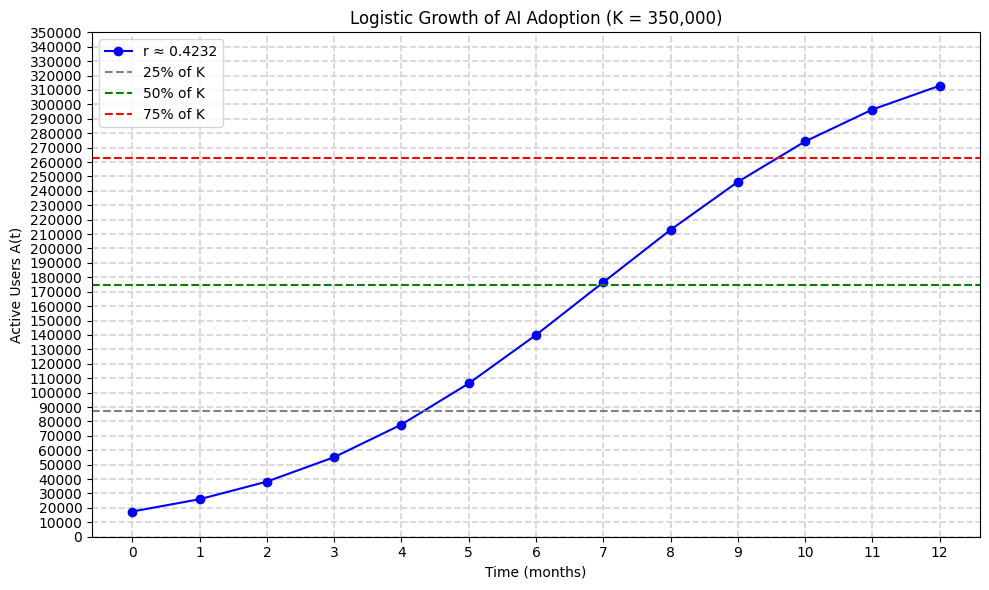

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
K = 350000               # Carrying capacity
A0 = 0.05 * K            # Initial adoption (5% of K)
A6 = 0.40 * K            # Adoption after 6 months (40% of K)
t1 = 6                   # Time interval in months

# Logistic growth function
def logistic(t, r):
    return K / (1 + ((K - A0) / A0) * np.exp(-r * t))

# Solve for r numerically
def equation(r):
    return logistic(t1, r) - A6

r_est = fsolve(equation, x0=0.1)[0]

# Simulate monthly adoption over 12 months
t = np.arange(0, 13, 1)  # Monthly steps
A_t = logistic(t, r_est)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, A_t, label=f"r ≈ {r_est:.4f}", color='blue', marker='o')
plt.axhline(0.25 * K, color='gray', linestyle='--', linewidth=1.5, label='25% of K')
plt.axhline(0.50 * K, color='green', linestyle='--', linewidth=1.5, label='50% of K')
plt.axhline(0.75 * K, color='red', linestyle='--', linewidth=1.5, label='75% of K')
plt.xticks(t)
plt.yticks(np.arange(0, K + 10000, 10000))
plt.title("Logistic Growth of AI Adoption (K = 350,000)")
plt.xlabel("Time (months)")
plt.ylabel("Active Users A(t)")
plt.grid(True, which='both', linestyle='--', linewidth=1.2, color='lightgray')
plt.legend()
plt.tight_layout()
plt.show()
